## Clasificador Naive Bayes: Explicación y Formalismo

El **clasificador Naive Bayes** es un modelo de aprendizaje supervisado basado en el **Teorema de Bayes**, diseñado para tareas de clasificación y especialmente adecuado para problemas con datos de alta dimensionalidad y pocas muestras. Es conocido por su simplicidad y eficiencia, lo que permite su aplicación en áreas como el procesamiento de lenguaje natural, la clasificación de texto y el filtrado de spam.

### 1. Concepto Básico

Naive Bayes es un clasificador probabilístico que se basa en calcular la probabilidad de que una muestra pertenezca a una clase determinada. La característica distintiva de este modelo es que asume que los **atributos son independientes** entre sí, lo cual rara vez se cumple en la práctica, pero simplifica los cálculos. A pesar de esta "ingenuidad" (de ahí su nombre "naive"), el clasificador tiende a producir buenos resultados en muchos problemas reales.

### 2. Formalismo Matemático

Para construir un clasificador Naive Bayes, usamos el **Teorema de Bayes**, que expresa la probabilidad condicional de que una muestra \( X = (X_1, X_2, \ldots, X_n) \) pertenezca a una clase \( C_k \):

$$
P(C_k | X) = \frac{P(X | C_k) \cdot P(C_k)}{P(X)}
$$

Como solo nos interesa la clase con la mayor probabilidad, y \( P(X) \) es constante para todas las clases, podemos simplificarlo a:

$$
P(C_k | X) \propto P(X | C_k) \cdot P(C_k)
$$

Con la asunción de independencia condicional entre las características \( X_i \), el modelo se simplifica aún más:

$$
P(C_k | X) \propto P(C_k) \prod_{i=1}^n P(X_i | C_k)
$$

Aquí:
- \( P(C_k) \): es la probabilidad de la clase \( C_k \), conocida como la **probabilidad a priori**.
- \( P(X_i | C_k) \): es la probabilidad condicional de cada característica dado \( C_k \).

En la práctica, estas probabilidades se calculan a partir de las frecuencias observadas en el conjunto de datos de entrenamiento.

### 3. Formalismo Computacional

Desde un punto de vista computacional, el clasificador Naive Bayes es eficiente debido a su naturaleza basada en conteos y multiplicaciones. Los pasos principales en su implementación son:

1. **Estimación de Probabilidades**: Primero, calculamos las probabilidades a priori de cada clase y las probabilidades condicionales de cada característica para cada clase.
2. **Clasificación de Nuevas Muestras**: Para una nueva muestra, el clasificador Naive Bayes calcula la probabilidad de que la muestra pertenezca a cada clase usando la ecuación anterior y selecciona la clase con la mayor probabilidad.
3. **Escalabilidad**: La clasificación de cada muestra es rápida y no requiere mucho procesamiento, lo que hace que el modelo sea adecuado para grandes volúmenes de datos y problemas con muchas características.

En Python, esto se implementa con bibliotecas como `scikit-learn`, que ofrecen métodos eficientes para ajustar y predecir con modelos de Naive Bayes.

### 4. Variantes de Naive Bayes

Existen varias variantes del clasificador Naive Bayes según el tipo de datos que se utilice:

- **Naive Bayes Gaussiano**: Suponiendo que las características siguen una distribución normal, se calcula la probabilidad condicional usando la media y varianza de cada clase.
- **Naive Bayes Multinomial**: Diseñado para datos discretos (como palabras en un texto), se utiliza en problemas de clasificación de texto.
- **Naive Bayes Bernoulli**: Adecuado para características binarias (presencia o ausencia), usado también en clasificación de texto binarizado.

### 5. Ventajas y Desventajas de Naive Bayes

**Ventajas**:
- **Simplicidad y Rapidez**: La independencia condicional permite simplificar el cálculo de probabilidades, haciéndolo rápido y eficiente.
- **Escalabilidad**: Funciona bien en problemas con muchas características y clases, escalando eficientemente con grandes volúmenes de datos.
- **Robustez con Datos Ruidosos**: Aunque la independencia condicional rara vez se cumple en la práctica, el modelo suele tener un rendimiento aceptable incluso en presencia de correlaciones entre características.

**Desventajas**:
- **Suposición de Independencia**: La suposición de independencia es poco realista en muchos problemas, lo que puede reducir la precisión si las características están altamente correlacionadas.
- **Datos Continuos**: Aunque el Naive Bayes Gaussiano trata datos continuos, el modelo original funciona mejor con datos discretos.

### 6. Implementación en Python

Podemos implementar un clasificador Naive Bayes de manera rápida y sencilla usando `scikit-learn`. A continuación, un ejemplo básico:


In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")

Precisión del modelo: 0.9778


# Clasificación con Maquinas de soporte Vectorial

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

In [3]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "/content/Social_Network_Ads.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
#Sacar las variables independientes
X = dataset.iloc[:,[2,3]].values

# Sacar la variable dependientes
y = dataset.iloc[:,4].values

In [6]:
#Division de Datos - entrenamiento y validacion

#herramienta para dividir los datos
from sklearn.model_selection import train_test_split

#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Escalado de Variables - Estandarizacion y Normalizacion

#Es preferible utilizalo en algortimos que usan el calculo de distancia - pitagoras

#Estandarizacion
sc_X = preprocessing.StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
#Ajuste del clasificdor con Maquinas de soporte vectorial

clasificador = GaussianNB()
clasificador.fit(X_train, y_train)

GaussianNB()

In [9]:
#Prediccion de los resultados con el conjusto de testing

y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre)
#Valores dados por los datos de testing
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [10]:
#Comprobacion del resultado - Matriz de confucion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pre)
cm

array([[55,  3],
       [ 4, 18]])

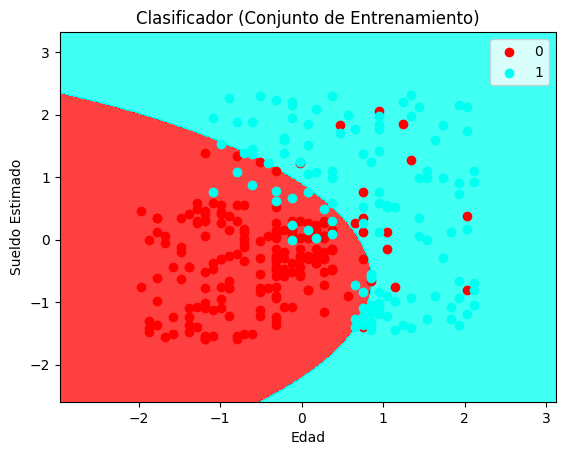

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Actualiza el cmap y asegúrate de que los colores sean válidos.
cmap = ListedColormap(['#FF0000', '#00FFF0'])

plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Corrige el mapeo de colores para cada clase.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

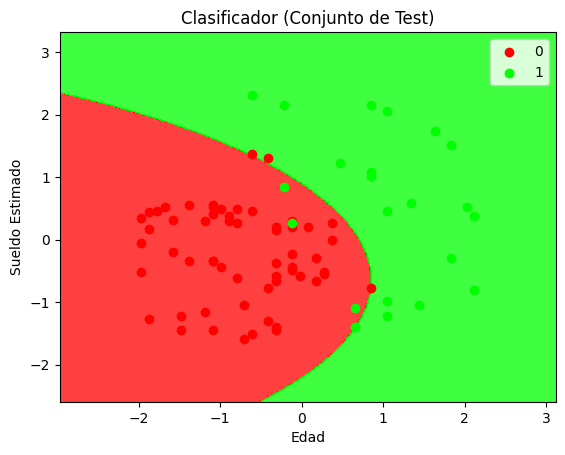

In [15]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Define el colormap con colores en formato hexadecimal
cmap = ListedColormap(['#FF0000', '#00FF00'])

# Genera el gráfico con el clasificador
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Colorea y etiqueta cada clase
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)

plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Ejemplo con clasificador de Naive Bayes

Consideremos un conjunto de datos artificial sobre el cual podamos probar un clasificador de Naive Bayes:

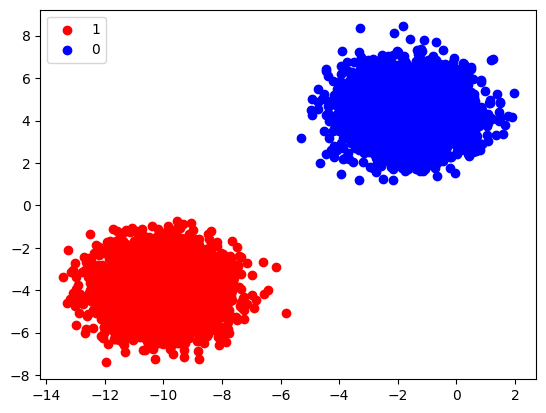

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

X, y = make_blobs(n_samples=10000, centers=2, n_features=2, random_state=1)

# esta función ajusta una gausiana
# a un conjunto 'data'
def fit_distribution(data):
  mu = data.mean()
  sigma = data.std()
  dist = norm(mu, sigma)
  return dist

plt.scatter(X[y==1][:,0], X[y==1][:,1], label = '1', color='red')
plt.scatter(X[y==0][:,0], X[y==0][:,1], label = '0', color = 'blue')
plt.legend()

Consideramos un modelo de clasificacion de Naive Bayes:

$$
P(c \vert x) = P(x \vert c)P(c)
$$

donde $P(c)$ es la probabilidad prior dada una clase $c$ y $P(x\vert c)$ es la verosimilitud de $x$ dada la una clase $c$, con Naive Bayes esto resulta en:

$$
P(c \vert x) = P(c)\prod_iP(x_i \vert c)
$$

Lo cual para nuestro caso (`n_features=2`) se traduce en:

$$
P(c \vert x) = \underbrace{P(c)}_{\text{prior}} \underbrace{P(x_0 \vert c) P(x_1 \vert c)}_{\text{likelihood}}
$$

In [17]:
# calculamos priors
def prior(c):
  return len(X[y==c])/len(X)

# tenemos cuatro posibles distribuciones a ajustar (verosimilitud)
# Izquierda
def distX0(c):
  if c==0:
    return fit_distribution(X[y==0][:,0])
  elif c==1:
    return fit_distribution(X[y==1][:,0])

# Derecha
def distX1(c):
  if c==0:
    return fit_distribution(X[y==0][:,1])
  elif c==1:
    return fit_distribution(X[y==1][:,1])

# verosimilitud
def likelihood(X, c):
  return distX0(c).pdf(X[0])*distX1(c).pdf(X[1])

# posterior
def probability(c, X):
  return prior(c)*likelihood(X,c)

predictions = [np.argmax([probability(0, vector), probability(1, vector)]) for vector in X]

Al final la distribución posterior nos da la probabilidad de que un dato `X` corresponda a una clase `c`. Luego de esto evaluamos el ajuste del modelo de clasificación al dataset artificial con una matriz de confusión:  

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predictions)

array([[5000,    0],
       [   0, 5000]])

Donde vemos que la distribución ajusta perfectamente los datos, de lo cual podemos también estimar la clase para otros puntos que no estaban inicialmente en el dataset:

In [19]:
def class_distribution(x, y):
  return np.argmax([probability(0, [x,y]), probability(1, [x,y])])

class_distribution(-6, 0)

1

In [20]:
class_distribution(-4, 0)

0

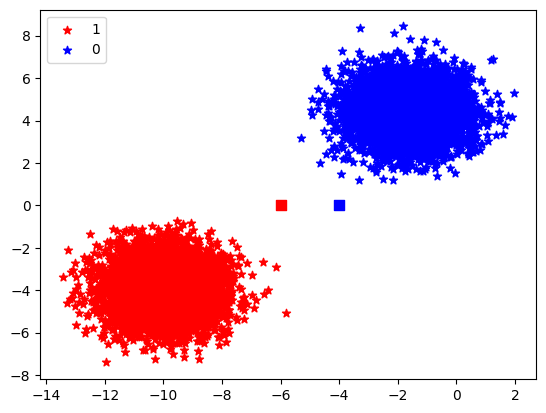

In [ ]:
plt.scatter(X[y==1][:,0], X[y==1][:,1], label = '1', color='red', marker = '*')
plt.scatter(X[y==0][:,0], X[y==0][:,1], label = '0', color = 'blue', marker='*')
plt.scatter(-6, 0, color = 'red', marker='s', s=53)
plt.scatter(-4, 0, color = 'blue', marker='s', s=53)
plt.legend()

En este plot anterior se evidencia cómo el clasificador basado en una distribución posterior puede clasificar puntos que no estaban en el conjunto de datos inicial (puntos con forma de cuadrado), permitiendo de esta manera extrapolar las funciones de clasificación mas allá de los datos iniciales.

# Otro ejemplo con Naive Bayes

Haremos un ejemplo para ilustrar el clasificador Naive Bayes.

En este ejemplo, clasificaremos textos según hablen de China ('zh') o Japón ('ja').

In [21]:
import numpy as np

## Datos de Entrenamiento

Supongamos que tenemos los siguientes datos de entrenamiento:

In [22]:
training = [
    ('chinese beijing chinese', 'zh'),
    ('chinese chinese shangai', 'zh'),
    ('chinese macao', 'zh'),
    ('tokyo japan chinese', 'ja'),
]

In [23]:
X_train = [doc for doc, _ in training]
y_train = [cls for _, cls in training]

In [24]:
X_train

['chinese beijing chinese',
 'chinese chinese shangai',
 'chinese macao',
 'tokyo japan chinese']

In [25]:
classes = ['zh', 'ja']

In [26]:
features = ['chinese', 'beijing', 'shangai', 'macao', 'tokyo', 'japan']

## Clasificador Naive Bayes

### Distribución a Priori ("prior")

Calculemos la distribución a priori (probabilidad de cada clase) usando máxima verosimilitud:

$$P(Y = y) = \frac{Count(Y = y)}{\sum_{y'} Count(Y = y')}$$

In [27]:
from collections import Counter

class_count = Counter(y_train)
class_count

Counter({'zh': 3, 'ja': 1})

In [28]:
prior_prob = {}
for c in classes:
    prior_prob[c] = class_count[c] / len(y_train)

    print(f'P({c}) = {prior_prob[c]:0.2f}')

P(zh) = 0.75
P(ja) = 0.25


In [29]:
prior_prob

{'zh': 0.75, 'ja': 0.25}

### Distribuciones Condicionales

Calculemos las distribuciones condicionales, esto es, la probabilidad de cada feature para cada clase.

Usaremos máxima verosimilitud y suavizado "add-one":

$$P(X_i = x|Y = y) = \frac{Count(X_i = x, Y = y) + 1}{\sum_{x'} Count(X_i = x', Y = y)+ |V|}$$

Primero calculamos los conteos:

In [30]:
feature_count = {}

for doc, cls in training:
    tokens = doc.split()  # lista de palabras
    for feature in tokens:
        if (feature, cls) not in feature_count:
            feature_count[feature, cls] = 0
        feature_count[feature, cls] = feature_count[feature, cls] + 1

O más cortito con `defaultdict`:

In [31]:
from collections import defaultdict
feature_count = defaultdict(int)

for doc, cls in training:
    tokens = doc.split()  # lista de palabras
    for feature in tokens:
        feature_count[feature, cls] += 1

In [32]:
dict(feature_count)

{('chinese', 'zh'): 5,
 ('beijing', 'zh'): 1,
 ('shangai', 'zh'): 1,
 ('macao', 'zh'): 1,
 ('tokyo', 'ja'): 1,
 ('japan', 'ja'): 1,
 ('chinese', 'ja'): 1}

Ahora calculamos las distribuciones:

In [33]:
V = len(features)

cond_prob = {}
for c in classes:
    cond_prob[c] = {}

    count_sum = sum(feature_count[f, c] for f in features)
    denom = count_sum + V

    for f in features:
        num = feature_count[f, c] + 1
        cond_prob[c][f] = num / denom

        print(f'P({f}|{c}) = {num} / {denom} ~ {cond_prob[c][f]:0.2f}')

P(chinese|zh) = 6 / 14 ~ 0.43
P(beijing|zh) = 2 / 14 ~ 0.14
P(shangai|zh) = 2 / 14 ~ 0.14
P(macao|zh) = 2 / 14 ~ 0.14
P(tokyo|zh) = 1 / 14 ~ 0.07
P(japan|zh) = 1 / 14 ~ 0.07
P(chinese|ja) = 2 / 9 ~ 0.22
P(beijing|ja) = 1 / 9 ~ 0.11
P(shangai|ja) = 1 / 9 ~ 0.11
P(macao|ja) = 1 / 9 ~ 0.11
P(tokyo|ja) = 2 / 9 ~ 0.22
P(japan|ja) = 2 / 9 ~ 0.22


### Predicción

Dado un documento, calculemos su clasificación. Para ello, calcularemos la probabilidad de cada clase, o mejor dicho algo propocional a esos valores (nos ahorramos el denominador $P(X=x)$).

$$P(Y=y|X=x) \propto P(Y=y) \prod_{i} P(X_i = x_i|Y=y)$$

In [34]:
doc = 'chinese chinese chinese tokyo japan'.split()

In [35]:
zh_prob = prior_prob['zh']
for w in doc:
    zh_prob = zh_prob * cond_prob['zh'][w]

print(f'P(zh|doc) ~ {zh_prob:0.4f}')

P(zh|doc) ~ 0.0003


In [36]:
ja_prob = prior_prob['ja']
for w in doc:
    ja_prob = ja_prob * cond_prob['ja'][w]

print(f'P(ja|doc) ~ {ja_prob:0.4f}')

P(ja|doc) ~ 0.0001


**¿Cuál es la clasificación?**
Valores probabilísticos:

In [ ]:
zh_prob / (zh_prob + ja_prob), ja_prob / (zh_prob + ja_prob)

(0.6897586117634673, 0.31024138823653263)

## Naive Bayes con Scikit-learn

Veamos cómo podemos clasificar documentos en **scikit-learn** usando Naive Bayes.

### Bolsas de Palabras (Bag of Words)

Representaremos a los documentos de manera vectorial usando bolsas de palabras:

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

Entrenamos (sin etiquetas) para que el vectorizador asigne una columna a cada feature posible:

In [38]:
vect.fit(X_train)

CountVectorizer()

In [39]:
vect.get_feature_names_out()

array(['beijing', 'chinese', 'japan', 'macao', 'shangai', 'tokyo'],
      dtype=object)

Veamos cómo se vectorizan los datos de entrenamiento:

In [40]:
X2 = vect.transform(X_train)

In [41]:
X2

<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [42]:
X2.todense()

matrix([[1, 2, 0, 0, 0, 0],
        [0, 2, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 1]])

Internamente, el vectorizador guarda el mapeo de features a columnas:

In [43]:
vect.vocabulary_

{'chinese': 1, 'beijing': 0, 'shangai': 4, 'macao': 3, 'tokyo': 5, 'japan': 2}

Ahora vectorizamos un nuevo documento:

In [44]:
doc = 'chinese chinese chinese tokyo japan'

In [45]:
X_test = vect.transform([doc])

In [46]:
X_test.todense()

matrix([[0, 3, 1, 0, 0, 1]])

In [47]:
# qué pasa si vectorizo esto?
doc = 'buenos aires'
X_test = vect.transform([doc])
X_test.todense()

matrix([[0, 0, 0, 0, 0, 0]])

### Multinomial Naive Bayes

Instanciamos y entrenamos [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes):

In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X2, y_train)

MultinomialNB()

Ahora predecimos:

In [49]:
mnb.predict(X_test)

array(['zh'], dtype='<U2')

También podemos obtener las probabilidades:

In [50]:
mnb.predict_proba(X_test)

array([[0.25, 0.75]])

### Parámetros Internos

Veamos cómo es internamente el modelo Naive Bayes en scikit-learn.

In [51]:
mnb.classes_

array(['ja', 'zh'], dtype='<U2')

In [52]:
mnb.class_count_

array([1., 3.])

In [53]:
mnb.feature_count_

array([[0., 1., 1., 0., 0., 1.],
       [1., 5., 0., 1., 1., 0.]])

In [54]:
np.exp(mnb.class_log_prior_)

array([0.25, 0.75])

In [55]:
np.exp(mnb.feature_log_prob_)

array([[0.11111111, 0.22222222, 0.22222222, 0.11111111, 0.11111111,
        0.22222222],
       [0.14285714, 0.42857143, 0.07142857, 0.14285714, 0.14285714,
        0.07142857]])

## Referencias

- [Naive Bayes classifier (Wikipedia)](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

Python:
- [defaultdict](https://docs.python.org/2/library/collections.html#collections.defaultdict)

Scikit-learn:
- [Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)